In [1]:
#mathematical operations
import math
import scipy as sp
import numpy as np

#data handling
import pandas as pd

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
sns.set()

#machine learning and statistical methods
import statsmodels.api as sm

#dataframe index manipulations
import datetime

#selected preprocessing and evaluation methods
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#muting unnecessary warnings if needed
import warnings

In [2]:
df = pd.read_excel("Case Prediction Data2.xlsx")

In [9]:
df_comp = df
df_comp.head()

,Case Number,Subject,Date Created,Date Closed,Origin,Priority,Team,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title,Date
0,204977,Efile Acceptance,2017-01-02,2017-01-03,Web,Medium,Tax Preparation,Efile,Platinum,We transmitted a Michigan return still have no...,Compliance,Returns / Reports,NaN,NaN,US.MI,Answer exists KB,041324813494120,How to understand the Transmission Monitor,2017-01-02
1,204979,Oregon STAT help: Previous Case 203787 Client ...,2017-01-02,2017-01-04,Web,High,Tax Preparation,Question / How To,Silver,Oregon STAT help: Previous Case 203787 Client ...,Provision,State,NaN,NaN,US.OR,Customer no longer needs assistance,NaN,NaN,2017-01-02
2,204980,Data map incorrectly pulling in values,2017-01-02,2017-01-03,Web,Medium,Tax Preparation,Question / How To,Silver,Corptax Office Import - Credit Account imports...,Office - Excel Add-In,Import / Export,NaN,NaN,US,Answer exists KB,041414821333274,Corptax® Office - How to place an IF formula i...,2017-01-02
3,204981,The New Corptax Connect Website is not properl...,2017-01-02,2017-01-03,Web,High,Tax Preparation,Problem / Error,Silver,Searches can't be performed on the new system....,Websites,Connections (https://connect.corptax.com),Error Message,NaN,NaN,Answer exists KB,161216104028927,Connections Error - Uh Oh something went wron...,2017-01-02
4,204986,LD400 is not reflecting a temporary adjustment,2017-01-03,2017-01-05,E-mail,Medium,Tax Preparation,Problem / Error,Platinum,LD400 is not reflecting a temporary adjustment,Compliance,Returns / Reports,NaN,NaN,US,Answer exists KB,041622907012748,Adjustments do not flow to LD400 workpaper and...,2017-01-03


In [10]:
#dfc = df[df.Product == "Compliance"]
# df_comp['Date Created'] = df_comp['Date Created'].dt.date
# df_comp['Date Closed'] = df_comp['Date Closed'].dt.date
# df_comp['Date'] = pd.to_datetime(df_comp['Date Created'], errors='coerce')
dfc = df_comp

In [12]:
# Adding a new column which will have the number of tickets per day
newdf = dfc[["Date","Case Number"]]
newdf.drop_duplicates(inplace=True)
newdf['Date'] = pd.to_datetime(newdf['Date'])
newdf = pd.DataFrame(newdf.groupby([newdf["Date"].dt.date]).count()["Case Number"])
newdf = newdf.asfreq('D')
newdf

C:\Users\shubendu.biswas\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\SHUBEN~1.BIS\AppData\Local\Temp/ipykernel_1656/1743943513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Date'] = pd.to_datetime(newdf['Date'])


,Case Number
Date,
2017-01-02,4.0
2017-01-03,84.0
2017-01-04,113.0
2017-01-05,106.0
2017-01-06,87.0
...,...
2022-08-11,110.0
2022-08-12,99.0
2022-08-13,16.0


In [13]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2052 entries, 2017-01-02 to 2022-08-15
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  2023 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB


In [15]:
newdf.isnull().sum()

Case Number    29
dtype: int64

In [18]:
f = Forecaster(y=newdf['Case Number'],current_dates=newdf.index)
f

Forecaster(
    DateStartActuals=2017-01-31T00:00:00.000000000
    DateEndActuals=2022-08-31T00:00:00.000000000
    Freq=M
    N_actuals=68
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

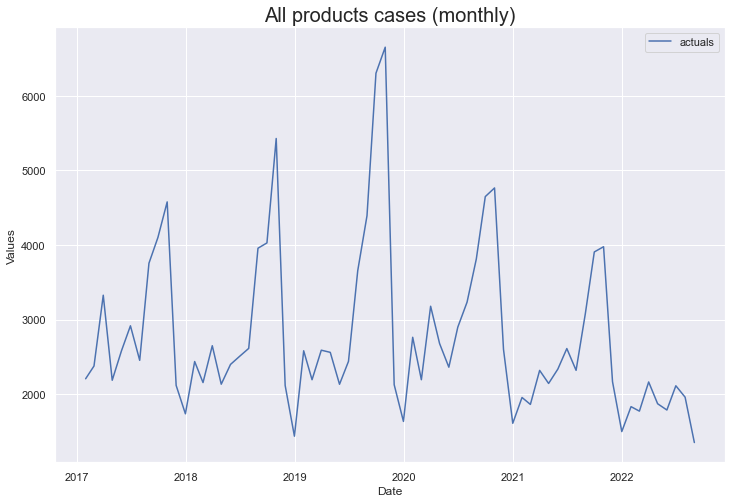

In [19]:
f.plot()
plt.title('All products cases (monthly)',size=20)
plt.show()

In [20]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_validation_length(12)
f

Forecaster(
    DateStartActuals=2017-01-31T00:00:00.000000000
    DateEndActuals=2022-08-31T00:00:00.000000000
    Freq=M
    N_actuals=68
    ForecastLength=12
    Xvars=[]
    Differenced=0
    TestLength=13
    ValidationLength=12
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [21]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: 0.83
the p-value is 0.9922
the series is not stationary
----------------------------------------------------------------------------------------------------


In [22]:
f.set_estimator('hwes')
f.manual_forecast(call_me='naive')

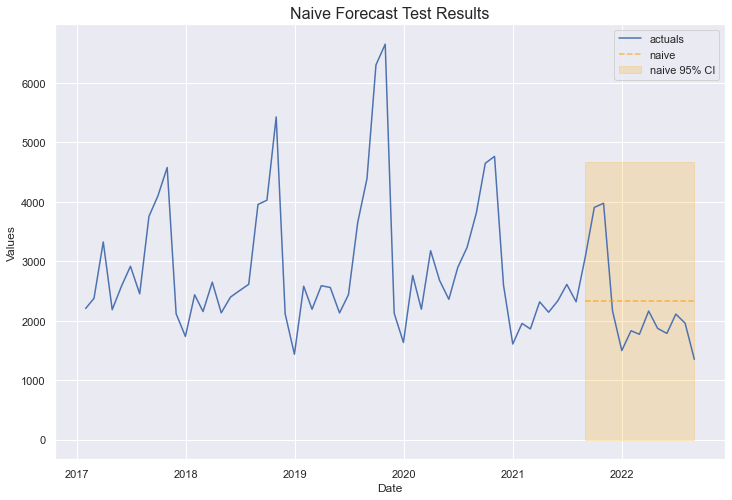

In [23]:
f.plot_test_set(ci=True)
plt.title('Naive Forecast Test Results',size=16)
plt.show()

# Trend

In [24]:
f.manual_forecast(trend='add',call_me='trend')

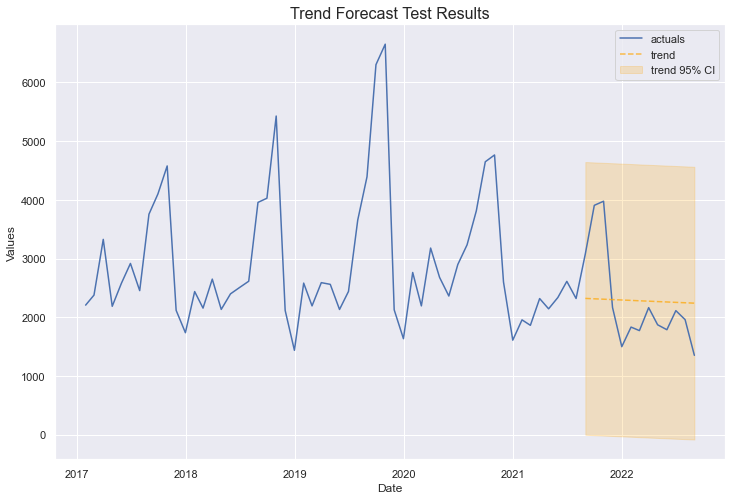

In [25]:
f.plot_test_set(ci=True,models='trend')
plt.title('Trend Forecast Test Results',size=16)
plt.show()

# Trend + Seasonality

In [26]:
f.manual_forecast(trend='add',seasonal='add',call_me='add')

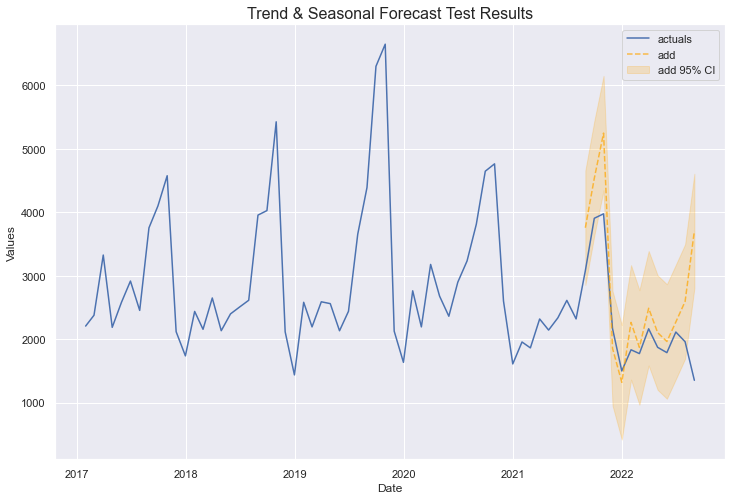

In [27]:
f.plot_test_set(ci=True,models='add')
plt.title('Trend & Seasonal Forecast Test Results',size=16)
plt.show()

# Multiplicative

In [28]:
f.manual_forecast(trend='mul',seasonal='mul',call_me='mul')

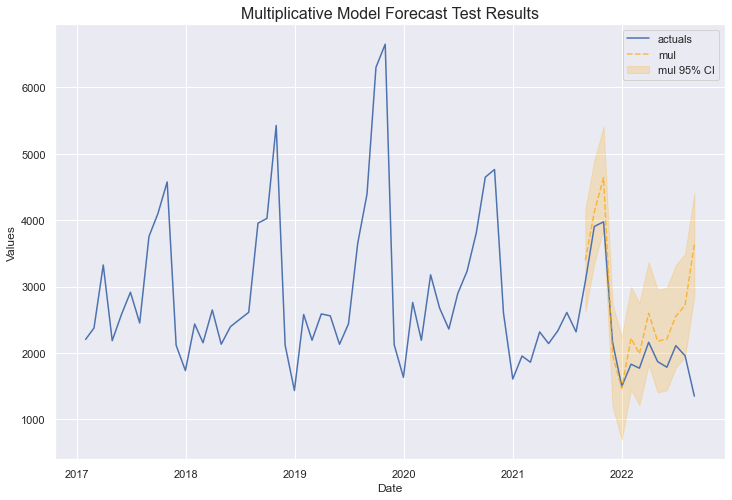

In [29]:
f.plot_test_set(ci=True,models='mul')
plt.title('Multiplicative Model Forecast Test Results',size=16)
plt.show()

# Tuning Model

In [30]:
grid = {
    'trend':['add','mul'],
    'seasonal':['add','mul'],
    'damped_trend':[True,False],
    'initialization_method':[None,'estimated','heuristic']
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='tuned')

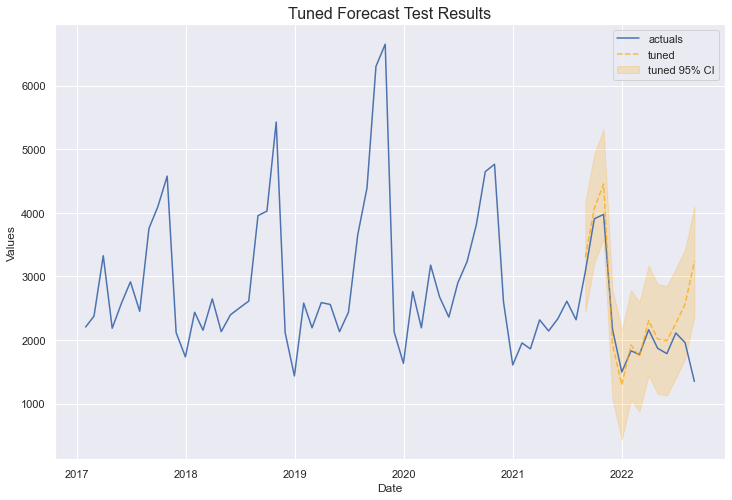

In [31]:
f.plot_test_set(ci=True,models='tuned')
plt.title('Tuned Forecast Test Results',size=16)
plt.show()

In [32]:
f.export_validation_grid('tuned').sort_values('metric_value').head(5)

,trend,seasonal,damped_trend,initialization_method,validation_length,validation_metric,metric_value
6,add,mul,True,None,12,rmse,542.221477
9,add,mul,False,None,12,rmse,606.671172
16,mul,add,False,estimated,12,rmse,654.120566
17,mul,add,False,heuristic,12,rmse,654.120566
7,add,mul,True,estimated,12,rmse,666.702514


In [33]:
pd.set_option('display.float_format',  '{:.4f}'.format)
ms = f.export('model_summaries',determine_best_by='TestSetRMSE')
ms[
    [
        'ModelNickname',
        'TestSetMAPE',
        'TestSetR2',
        'InSampleMAPE',
        'InSampleR2',
        'models',
        'best_model'
    ]
]

,ModelNickname,TestSetMAPE,TestSetR2,InSampleMAPE,InSampleR2,models,best_model
0,tuned,0.1985,0.4874,0.1164,0.8615,None,True
1,mul,0.2820,0.1563,0.1070,0.8902,None,False
2,trend,0.2769,0.0418,0.2782,0.0886,None,False
3,naive,0.3042,-0.0073,0.2751,0.1105,None,False
4,add,0.2899,-0.0350,0.1306,0.8262,None,False


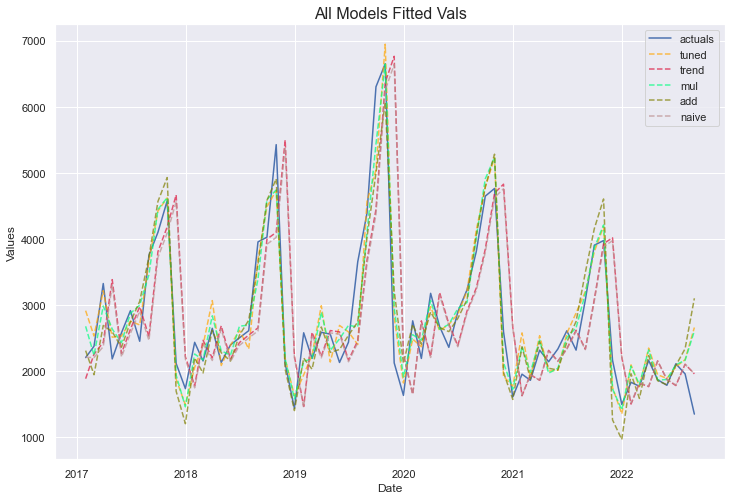

In [34]:
f.plot_fitted(order_by='TestSetMAPE')
plt.title('All Models Fitted Vals',size=16)
plt.show()

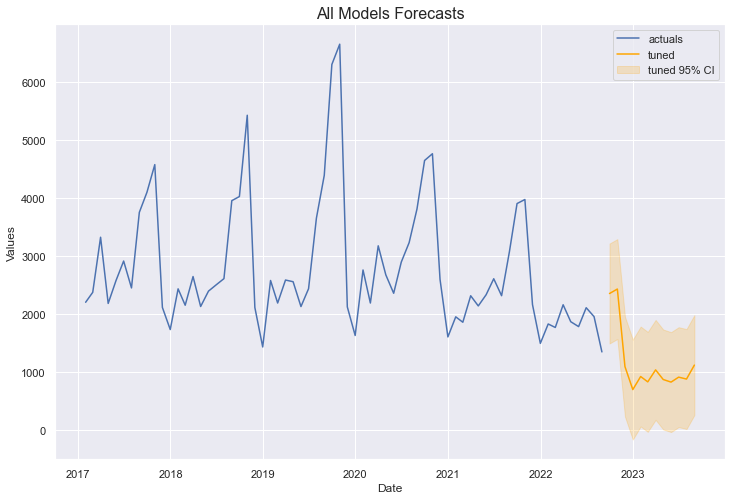

In [36]:
f.plot(ci=True,models='top_1',order_by='TestSetMAPE')
plt.title('All Models Forecasts',size=16)
plt.show()

# Auto-ARIMA Approach

In [16]:
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=4, 
    max_D=4,
    max_Q=4,
    max_d=4,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=931.754, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=872.990, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1042.747, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=917.428, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=892.465, Time=0.19 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=884.618, Time=0.18 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=930.520, Time=0.02 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=902.726, Time=0.09 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=880.677, Time=0.27 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=871.423, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=912.5

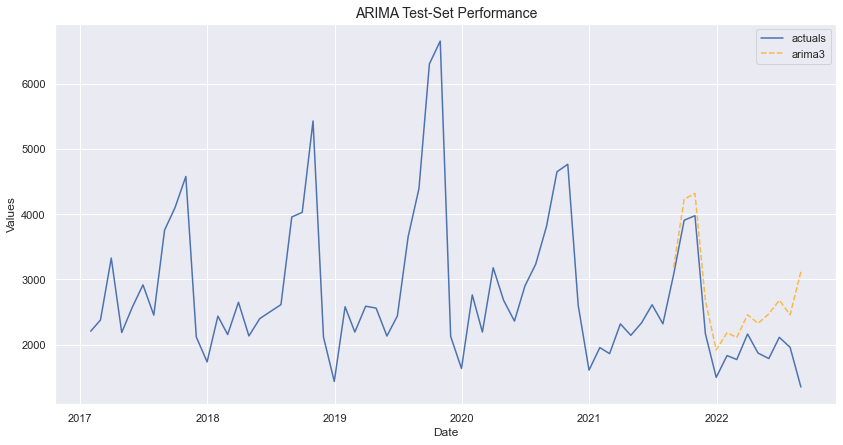

In [17]:
f.plot_test_set(ci=False,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

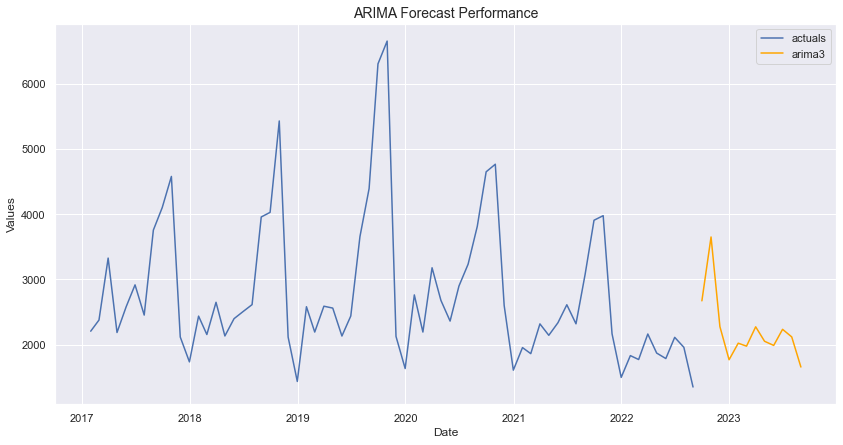

In [18]:
f.plot(ci=False,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [19]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [23]:
results.keys()

dict_keys(['model_summaries', 'best_fcst', 'all_fcsts', 'test_set_predictions', 'lvl_fcsts', 'lvl_test_set_predictions'])

In [45]:
d1 = results["test_set_predictions"][["DATE","arima3"]]
d2 = results["all_fcsts"][["DATE","arima3"]]

In [60]:
d_pred = pd.concat([d1,d2],axis=0)
d_pred

,DATE,arima3
55,2021-08-31,3183.451538
56,2021-09-30,4228.332149
57,2021-10-31,4316.476384
58,2021-11-30,2672.130491
59,2021-12-31,1919.105177
60,2022-01-31,2182.018152
61,2022-02-28,2111.350792
62,2022-03-31,2457.848817
63,2022-04-30,2324.872601
64,2022-05-31,2471.526371


In [61]:
d_pred.to_csv("file.csv",index=False)

In [62]:
newdf.reset_index().to_csv("file2.csv",index=False)

In [56]:
origin_df["arima3"] = np.NAN

In [57]:
origin_df

,Date,Case Number,arima3
0,2017-01-31,2206.0,NaN
1,2017-02-28,2377.0,NaN
2,2017-03-31,3326.0,NaN
3,2017-04-30,2186.0,NaN
4,2017-05-31,2581.0,NaN
...,...,...,...
63,2022-04-30,1871.0,NaN
64,2022-05-31,1787.0,NaN
65,2022-06-30,2112.0,NaN
66,2022-07-31,1959.0,NaN


In [58]:
pd.concat(origin_df,d_pred)

ValueError: Merge keys contain null values on left side

In [37]:
import plotly.express as px
fig = px.line(origin_df, x='Date', y="Case Number")
fig.show()

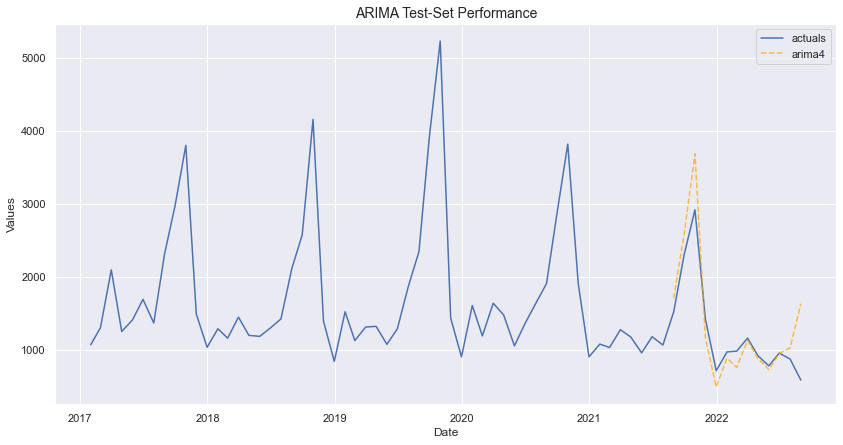

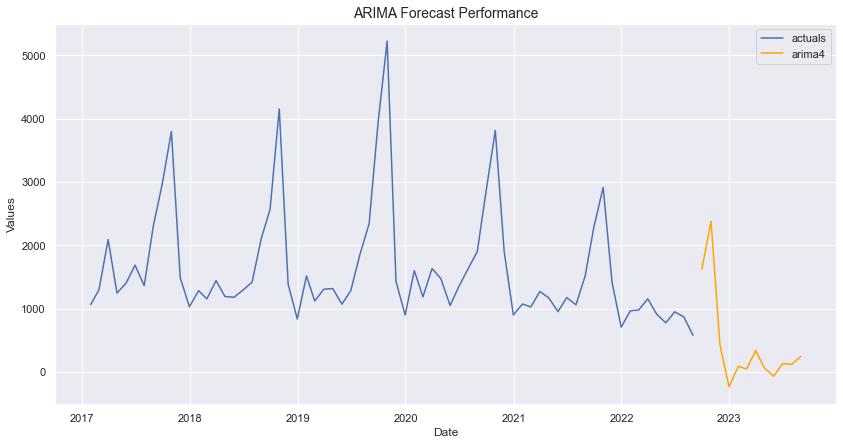

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   68
Model:             ARIMA(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -408.452
Date:                            Fri, 26 Aug 2022   AIC                            824.904
Time:                                    16:51:44   BIC                            832.933
Sample:                                         0   HQIC                           828.009
                                             - 68                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2737      0.188     -1.454      0.146      -0.643       0.095
ar.S.L12       0.3900      0.330      1.182      0.237      -0.257       1.037
ma.S.L12      -0.9902     10.486     -0.094      0.925     -21.541      19.561
sigma2      1.333e+05   1.36e+06      0.098      0.922   -2.53e+06     2.8e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                12.44
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.46
Prob(H) (two-sided):                  0.54   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [215]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=False,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=False,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [216]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [217]:
results["test_set_predictions"]
results["all_fcsts"]

,DATE,actual,arima4,arima2,arima3,arima1
55,2021-08-31,1517.0,1702.625656,1864.583179,1889.436807,1711.981871
56,2021-09-30,2300.0,2582.738084,2511.477406,3386.024467,1711.981871
57,2021-10-31,2915.0,3682.114872,3633.539862,4377.117595,1711.981871
58,2021-11-30,1417.0,1161.872889,1299.856642,1718.021872,1711.981871
59,2021-12-31,710.0,487.171588,655.024484,895.707528,1711.981871
60,2022-01-31,968.0,879.611172,972.754895,1298.928629,1711.981871
61,2022-02-28,979.0,756.989674,883.125150,1094.670314,1711.981871
62,2022-03-31,1157.0,1125.841442,1230.653855,1424.927616,1711.981871
63,2022-04-30,914.0,874.646439,942.788336,1298.279566,1711.981871
64,2022-05-31,777.0,725.686055,904.774353,995.411103,1711.981871


In [218]:
results["all_fcsts"]

,DATE,arima1,arima2,arima3,arima4
0,2022-09-30,1620.819437,1932.067910,1889.421139,1625.693075
1,2022-10-31,1620.819437,2981.945128,2733.757837,2382.789529
2,2022-11-30,1620.819437,791.024890,1294.865269,430.849719
3,2022-12-31,1620.819437,236.550741,619.085756,-235.628436
4,2023-01-31,1620.819437,619.801875,909.955076,90.661312
5,2023-02-28,1620.819437,525.169692,940.730385,48.910194
6,2023-03-31,1620.819437,854.534913,1144.475346,338.270787
7,2023-04-30,1620.819437,549.847584,931.090655,62.277341
8,2023-05-31,1620.819437,428.037525,790.075445,-64.500533
9,2023-06-30,1620.819437,631.389797,975.325472,133.178434


In [2]:
st = "hello"

In [3]:
for i in st:
    print(i)

h
e
l
l
o


In [12]:
def removeDuplicate(string1):
    s = set()
     
    # Create a set using String characters
    for i in string1:
        s.add(i)
 
    # Print content of the set
    st = ""
    for i in s:
        st = st+i
    return st

In [14]:
removeDuplicate("sshub biss")

'siubh '

In [17]:
l1 = [3,1,6,4]
sorted(l1, reverse = True)

[6, 4, 3, 1]

In [31]:
def rev(a):
    if isinstance(a,dict):
        a = list(a.values())
        result = sorted(a, reverse = True)
        return result
    else:
        result = sorted(a, reverse = True)
        return result
    

In [32]:
rev({"a":10,"d":20})

[20, 10]

In [34]:
a = ['a','d','c']

In [35]:
sorted(a)

['a', 'c', 'd']

In [36]:
dd = {"a":10,"d":20}

In [40]:
sorted(list(dd.keys()), reverse = True)

['d', 'a']